In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import student

In [42]:
rws = cv2.cvtColor(cv2.imread('data1/rws.jpg'), cv2.COLOR_BGR2GRAY)
rws2 = cv2.cvtColor(cv2.imread('data1/rws4.jpeg'), cv2.COLOR_BGR2GRAY)

key_points_1, descriptor_1 = cv2.SIFT_create().detectAndCompute(rws, None)
key_points_2, descriptor_2 = cv2.SIFT_create().detectAndCompute(rws2, None)

In [43]:
def mymatcher(kps1, des1, kps2, des2,img1, img2):
    matches = []
    for query_id, query_value in enumerate(descriptor_1):
        for train_id, train_value in enumerate(descriptor_2):
            matches.append(cv2.DMatch(
                                      _distance=int(np.linalg.norm(query_value-train_value)),
                                      _queryIdx=query_id,
                                      _trainIdx=train_id
                                      )
                          )
    matches = sorted(matches, key = lambda x:x.distance)
    good = []
    for m in matches[:15]:
        good.append([m])

    return cv2.drawMatchesKnn(img1, kps1, img2, kps2, good, None, flags=2)

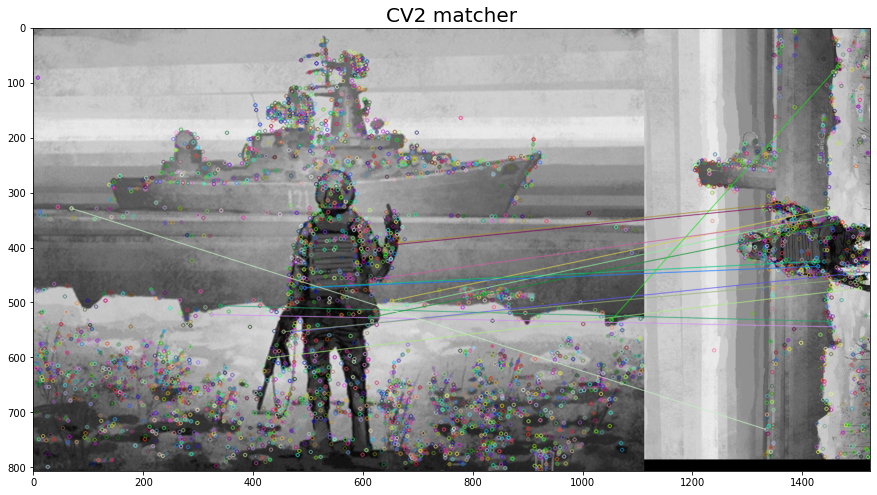

(<matplotlib.image.AxesImage at 0x7f87695c47c0>, None)

In [44]:
plt.figure(figsize=(15,10))
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = sorted(bf.match(descriptor_1, descriptor_2), key = lambda x: x.distance)[:15]

match_img = cv2.drawMatches(rws, key_points_1, rws2, key_points_2, matches, None)

plt.title('CV2 matcher', fontsize=20)
plt.imshow(match_img), plt.show()

In [45]:
matchimg = mymatcher(key_points_1, descriptor_1, key_points_2, descriptor_2, rws, rws2)

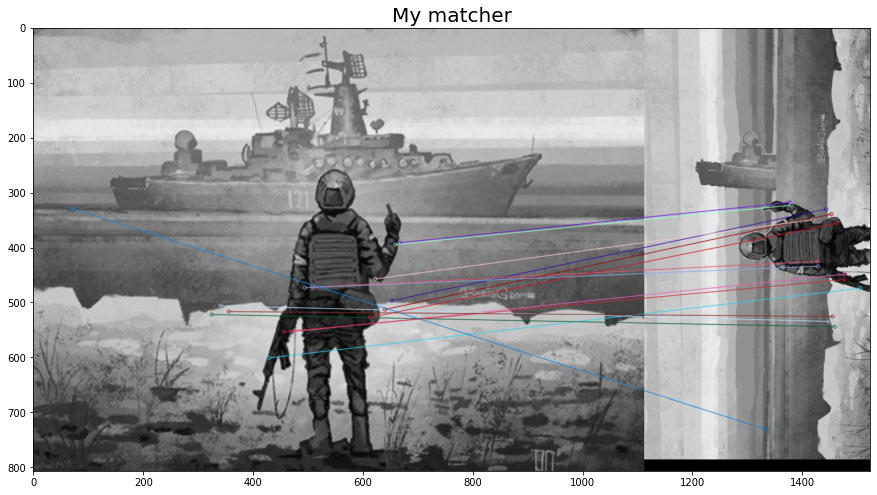

In [46]:
plt.figure(figsize=(15,10))
plt.title('My matcher', fontsize=20)
plt.imshow(matchimg, cmap='gray')
plt.show()

In [51]:
def features_to_nd(key_points):
    x = []
    y = []
    for i in range(len(key_points)):
        x.append(key_points[i].pt[0])
        y.append(key_points[i].pt[1])
    return np.array(x), np.array(y)

In [52]:
descriptor_GLOH_1 = student.get_features(rws, features_to_nd(key_points_1)[0], features_to_nd(key_points_1)[1], 16)
descriptor_GLOH_2 = student.get_features(rws2, features_to_nd(key_points_2)[0], features_to_nd(key_points_2)[1], 16)

In [53]:
matchimg_GLOH = mymatcher(key_points_1, descriptor_GLOH_1, key_points_2, descriptor_GLOH_2, rws, rws2)

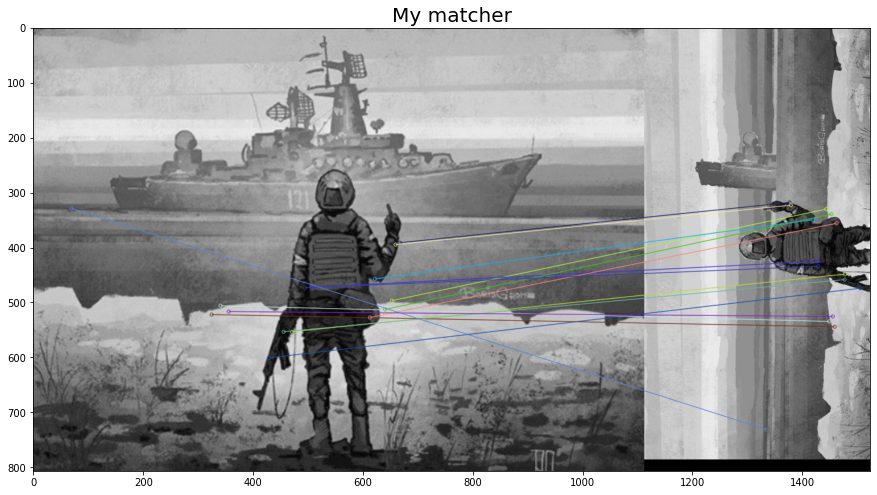

In [54]:
plt.figure(figsize=(15,10))
plt.title('My matcher', fontsize=20)
plt.imshow(matchimg_GLOH, cmap='gray')
plt.show()